# 主題：新鮮人在資料科學家和機器學習的薪資分析

# 1. 研究動機
統計研究所的學生畢業後，許多人選擇投入資料科學或機器學習等相關工作。由於這些領域在業界需求持續成長，了解入門職位的薪資水準對學生職涯規劃具有實質幫助。因此，本次研究想利用實際資料分析 Entry-Level 資料科學家的薪資分布，並進一步和機器學習工程師，比較兩者薪資是否存在顯著差異。



# 2. 研究問題
1. Entry level資料科學家的年薪在哪個區間?平均與變異程度為何?
2. Entry level資料科學家與機器學習工程師的年薪是否有顯著差異?

# 3. 資料來源、介紹、前處理
1. 資料來源：
   1. https://www.kaggle.com/datasets/murilozangari/jobs-and-salaries-in-data-field-2024
   2. 本研究透過 Kaggle API 下載資料並進行分析。
2. 資料介紹：
 * 該資料集收錄了 2024 年資料領域相關工作的職缺與薪資資訊，欄位包括 work_year, experience_level, employment_type,	job_title,	salary,	salary_currency,	salary_in_usd,	employee_residence,	work_setting,	company_location,	company_size,	job_category
3. 資料前處理：
   1. 篩選出 **Entry-Level** 的資料，符合「剛出社會的新鮮人」為分析對象的需求。
   2. 根據職稱（job_title），分別選出包含 **Data Scientist** 或 **Data Science** 以及 **Machine Learning Engineer** 或 **ML Engineer** 的觀測值。
   3. 薪資原始以美元（salary_in_usd）呈現，為了更符合台灣學生的理解，本研究將其乘以 30 換算為新台幣（TWD）（salary_in_tw）。
   4. 最終產生兩組樣本：**Entry-Level 資料科學家**與 **Entry-Level 機器學習工程師**的年薪資料，作為後續分析與假設檢定使用。







In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import zipfile
import os
from scipy.stats import norm

In [ ]:
# Download data from kaggle
api_token = {"username":"xxxxxxxxx","key":"xxxxxxxxxxxxxxxxxxxxx"}

if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')

!kaggle datasets download -d murilozangari/jobs-and-salaries-in-data-field-2024 --force
!ls /kaggle

Dataset URL: https://www.kaggle.com/datasets/murilozangari/jobs-and-salaries-in-data-field-2024
License(s): apache-2.0
  0% 0.00/127k [00:00<?, ?B/s]
100% 127k/127k [00:00<00:00, 184MB/s]
input  jobs-and-salaries-in-data-field-2024.zip


In [ ]:
!unzip \*.zip

Archive:  jobs-and-salaries-in-data-field-2024.zip
  inflating: jobs_in_data_2024.csv   


In [ ]:
import pandas as pd

df = pd.read_csv("jobs_in_data_2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


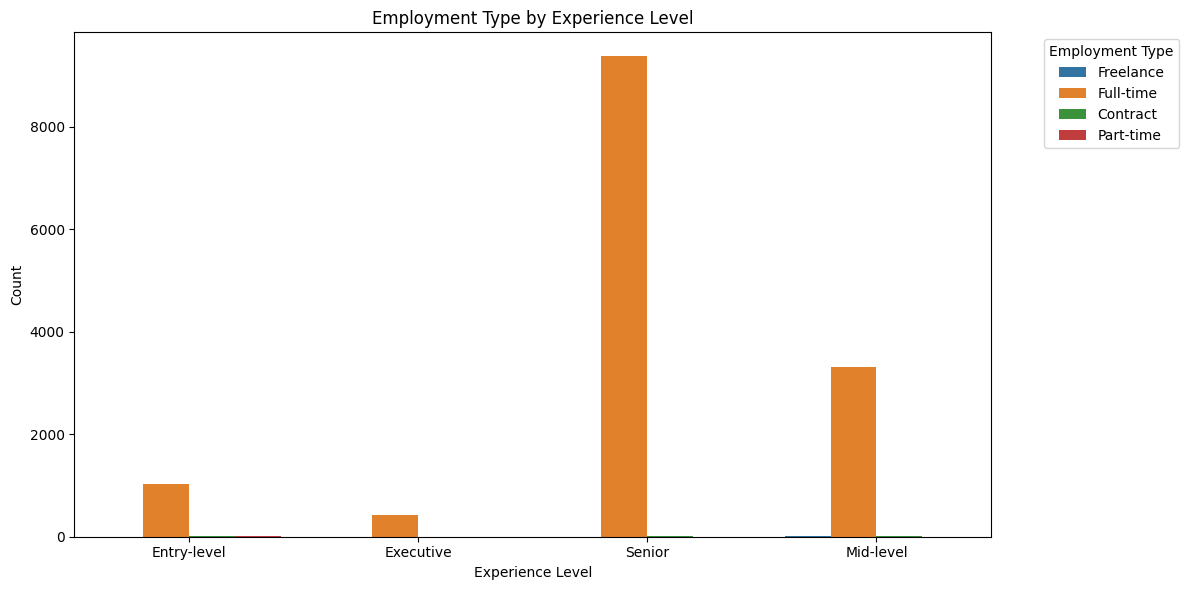

In [ ]:
# experience_level vs employment_type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="experience_level", hue="employment_type")
plt.title("Employment Type by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

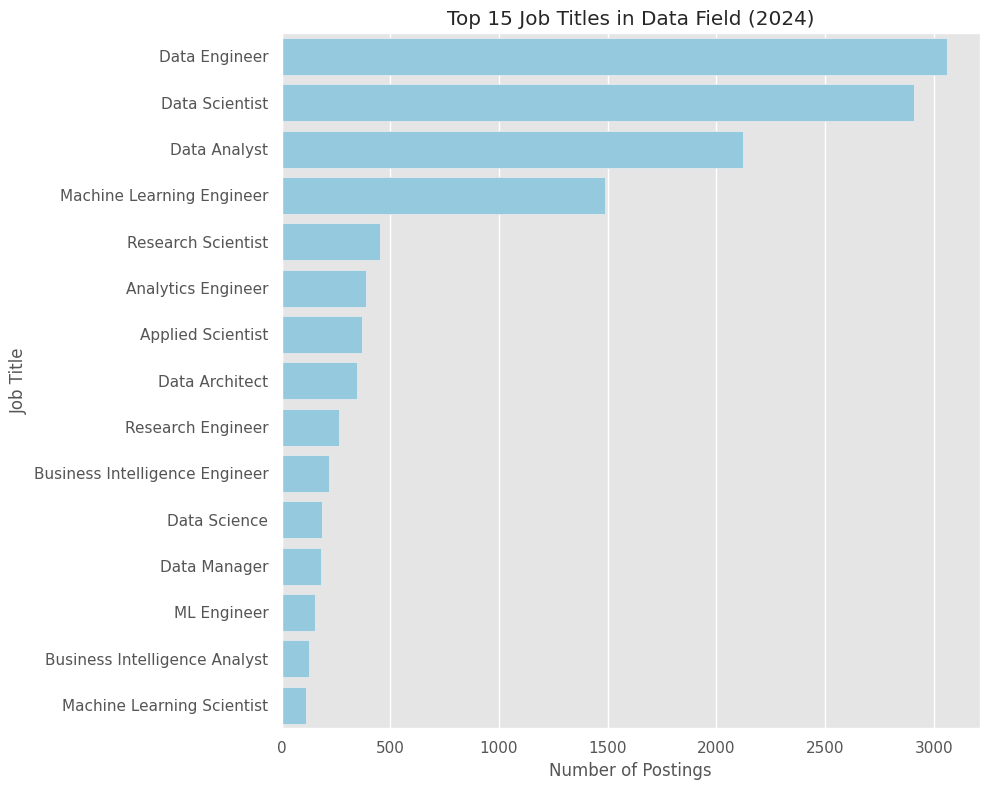

In [ ]:
# The job title about data field
plt.figure(figsize=(10, 8))
top_jobs = df['job_title'].value_counts().nlargest(15)

sns.barplot(y=top_jobs.index, x=top_jobs.values, color="skyblue")

plt.title("Top 15 Job Titles in Data Field (2024)")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

In [ ]:
# Data Science Entry level Salary
ds_entry_df = df[
    (
        df["job_title"].str.contains("Data Scientist", case=False) |
        df["job_title"].str.contains("Data Science", case=False)
    ) &
    (df["experience_level"].str.lower() == "entry-level")
].copy()

ds_entry_df.loc[:, "salary_in_tw"] = ds_entry_df["salary_in_usd"] * 30

ds_entry_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,salary_in_tw
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research,900000
132,2024,Entry-level,Full-time,Data Science,51550,EUR,57277,France,Hybrid,France,M,Data Science and Research,1718310
248,2024,Entry-level,Full-time,Data Science Analyst,70000,USD,70000,United States,In-person,United States,M,Data Science and Research,2100000
249,2024,Entry-level,Full-time,Data Science Analyst,64000,USD,64000,United States,In-person,United States,M,Data Science and Research,1920000
895,2024,Entry-level,Full-time,Data Scientist,26800,GBP,33500,United Kingdom,In-person,United Kingdom,M,Data Science and Research,1005000


In [ ]:
len(ds_entry_df)

158

In [ ]:
# Machine Learning Entry level Salary
ml_df = df[
    ((df["job_title"].str.contains("Machine Learning", case=False)) |
     (df["job_title"].str.contains("ML", case=False))) &
    (df["experience_level"].str.lower() == "entry-level")
].copy()
ml_df.loc[:, "salary_in_tw"] = ml_df["salary_in_usd"] * 30
ml_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,salary_in_tw
100,2024,Entry-level,Full-time,Machine Learning Engineer,157900,USD,157900,Canada,Remote,Canada,M,Machine Learning and AI,4737000
101,2024,Entry-level,Full-time,Machine Learning Engineer,105300,USD,105300,Canada,Remote,Canada,M,Machine Learning and AI,3159000
452,2024,Entry-level,Full-time,Machine Learning Engineer,187500,USD,187500,United States,In-person,United States,M,Machine Learning and AI,5625000
453,2024,Entry-level,Full-time,Machine Learning Engineer,99500,USD,99500,United States,In-person,United States,M,Machine Learning and AI,2985000
931,2024,Entry-level,Full-time,ML Engineer,27000,USD,27000,Türkiye,In-person,Türkiye,S,Machine Learning and AI,810000


In [ ]:
len(ml_df)

68

# 4. Bootstrap

## 1. Use bootstrap methods to estimate bias, variance and MSE associated with the parameters of interest to you.
我現在關注的參數是 Entry-Level 資料科學家的平均年薪（新台幣）。因為資料只有158筆，為了更準確地評估平均年薪，我採用 Bootstrap 方法進行模擬，針對原始樣本重複進行 1000 次隨機抽樣，並計算以下統計量：

* 真實樣本平均（True Mean）：TWD 2,592,996
* 真實樣本標準差（True Std）：TWD 1,269,985
* Bootstrap Mean：TWD 2,594,207
* Bootstrap Bias：TWD 1,211
* Bootstrap Std：TWD 103,882
* Bootstrap MSE：TWD 10,792,866,223
* 結論：

  * Bootstrap 模擬結果顯示，Entry-Level 資料科學家的平均年薪約為 2,594,207 元台幣，與原始樣本的平均值差距極小，僅相差 1,200 元，表示在 1000 次抽樣下估計值幾乎不偏，相當穩定。
  
  * 雖然年薪本身的變異性偏大，但透過 Bootstrap 抽樣後平均數的估計變異約為 10 萬元，整體 MSE 也落在合理範圍，表示本研究中平均年薪的推論結果相當可靠。



In [ ]:
np.random.seed(2025)

# Bootstrap
def bootstrap(data, B=1000):
    bootstrap_list = []
    n = len(data)

    for _ in range(B):
        sample = data.sample(n=n, replace=True)
        bootstrap_estimate = sample.mean()
        bootstrap_list.append(bootstrap_estimate)

    return np.array(bootstrap_list)

bootstrap_result = bootstrap(ds_entry_df["salary_in_tw"])

bootstrap_mean = np.mean(bootstrap_result)
bootstrap_bias = bootstrap_mean - ds_entry_df["salary_in_tw"].mean()
bootstrap_std = np.std(bootstrap_result, ddof=1)
bootstrap_mse = bootstrap_std**2 + bootstrap_bias**2

print(f"True mean: {ds_entry_df['salary_in_tw'].mean():.4f}")
print(f"True standard deviation: {ds_entry_df['salary_in_tw'].std():.4f}")
print(f"Bootstrap Mean: {bootstrap_mean:.4f}")
print(f"Bootstrap Bias: {bootstrap_bias:.4f}")
print(f"Bootstrap Std: {bootstrap_std:.4f}")
print(f"Bootstrap MSE: {bootstrap_mse:.4f}")

True mean: 2592995.6962
True standard deviation: 1269984.8407
Bootstrap Mean: 2594207.2061
Bootstrap Bias: 1211.5099
Bootstrap Std: 103881.6561
Bootstrap MSE: 10792866222.8610


## 2. Use the bootstrap methods to construct confidence intervals and conduct hypothesis testing. Compare the results of these methods and conclude your findings.



### 1. Confidence Interval
為了對 Entry-Level 資料科學家的平均年薪進行推估，我使用了四種不同的 Bootstrap 方法來估計 95% 信賴區間，分別為：
1. Simple Method
2. The Percentile Method
3. The BC Percentile Method
4. The BCa Percentile Method

Method | Lower Bound (TWD) | Bootstrap Mean (TWD) | Upper Bound (TWD)
--------|-----------------------|----------------------|----------------------|
Simple Method | 2,371,755 | 2,594,207 | 2,788,582
Percentile Method | 2,397,409 | 2,594,207 | 2,814,237
BC Percentile | 2,394,523 | 2,594,207 | 2,811,745
BCa Percentile | 2,394,681 | 2,594,207 | 2,814,237

不同方法的上下界略有差異：

1. Simple Method 的上下界和其他方法不同，下限最低，上限稍窄，原因在於它是用雙倍差異反推而來。在本研究中，資料科學家的薪資變異較大，導致以此方法計算出的區間下限偏離。
2. Percentile / BC / BCa Method 的信賴區間較類似。因為資料科學家的年薪偏態較不嚴重，所以使得進行偏誤校正與 acceleration factor 校正後的區間結果與原始百分位法相差不大。


In [ ]:
boot_table = pd.DataFrame({
    "Method": ["Simple_Method", "Percentile_Method", "BC_Percentile", "BCa_Percentile"],
    "Lower_Bound": [0.0]*4,
    "Bootstrap_Mean": [bootstrap_mean]*4,
    "Upper_Bound": [0.0]*4,
})

# 1. Simple Method for 95% CI
def simple_method(data, boot_est, alpha=0.05):
    B = len(boot_est)
    sort_est = np.sort(boot_est)
    data_est = np.mean(data)

    v1 = int((B + 1) * alpha / 2)
    v2 = int((B + 1) * (1 - alpha / 2))

    lower = 2 * data_est - sort_est[v2]
    upper = 2 * data_est - sort_est[v1]

    return lower, upper

# 2. The Percentile Method
def percentile_method(data, boot_est, alpha=0.05):
    B = len(boot_est)
    sort_est = np.sort(boot_est)

    v1 = int((B + 1) * alpha / 2)
    v2 = int((B + 1) * (1 - alpha / 2))

    lower = sort_est[v1]
    upper = sort_est[v2]

    return lower, upper

# 3. The BC Percentile Method
def bc_percentile_method(data, boot_est, alpha=0.05):
    B = len(boot_est)
    sort_est = np.sort(boot_est)

    z0 = norm.ppf(np.mean(boot_est < np.mean(data)))

    z_alpha_lo = norm.ppf(alpha / 2)
    z_alpha_hi = norm.ppf(1 - alpha / 2)

    v1 = int((B + 1) * norm.cdf(2 * z0 - z_alpha_hi))
    v2 = int((B + 1) * norm.cdf(2 * z0 - z_alpha_lo))

    lower = sort_est[v1]
    upper = sort_est[v2]

    return lower, upper

# 4. The BCa Percentile Method
def bca_percentile_method(data, boot_est, alpha=0.05):
    data = np.array(data)
    B = len(boot_est)
    n = len(data)

    # Step 1: bias-correction factor z0
    z0 = norm.ppf(np.sum(boot_est < np.mean(data)) / B)

    # Step 2: jackknife estimates
    jack_est = np.array([np.mean(np.delete(data, i)) for i in range(n)])
    jack_mean = np.mean(jack_est)

    # Step 3: acceleration factor a
    num = np.sum((jack_mean - jack_est) ** 3)
    denom = 6 * (np.sum((jack_mean - jack_est) ** 2) ** 1.5)
    a = num / denom if denom != 0 else 0

    # Step 4: adjusted alpha quantiles
    z_alpha = norm.ppf(1 - alpha/2)
    beta1 = 1 - norm.cdf(z0 + (z0 - z_alpha) / (1 - a * (z0 - z_alpha)))
    beta2 = 1 - norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha)))

    # Step 5: 對應到 bootstrap 分位數
    sorted_boot = np.sort(boot_est)
    v1 = int((B + 1)*(1 - beta1))
    v2 = int((B + 1)*(1 - beta2))

    lower = sorted_boot[v1]
    upper = sorted_boot[v2]

    return lower, upper

methods = [simple_method, percentile_method, bc_percentile_method, bca_percentile_method]

for i, method in enumerate(methods):
    lb, ub = method(ds_entry_df["salary_in_tw"], bootstrap_result)
    boot_table.loc[i, "Lower_Bound"] = lb
    boot_table.loc[i, "Upper_Bound"] = ub

# 顯示結果
print(boot_table)

              Method   Lower_Bound  Bootstrap_Mean   Upper_Bound
0      Simple_Method  2.371755e+06    2.594207e+06  2.788582e+06
1  Percentile_Method  2.397409e+06    2.594207e+06  2.814237e+06
2      BC_Percentile  2.394523e+06    2.594207e+06  2.811745e+06
3     BCa_Percentile  2.394681e+06    2.594207e+06  2.814237e+06


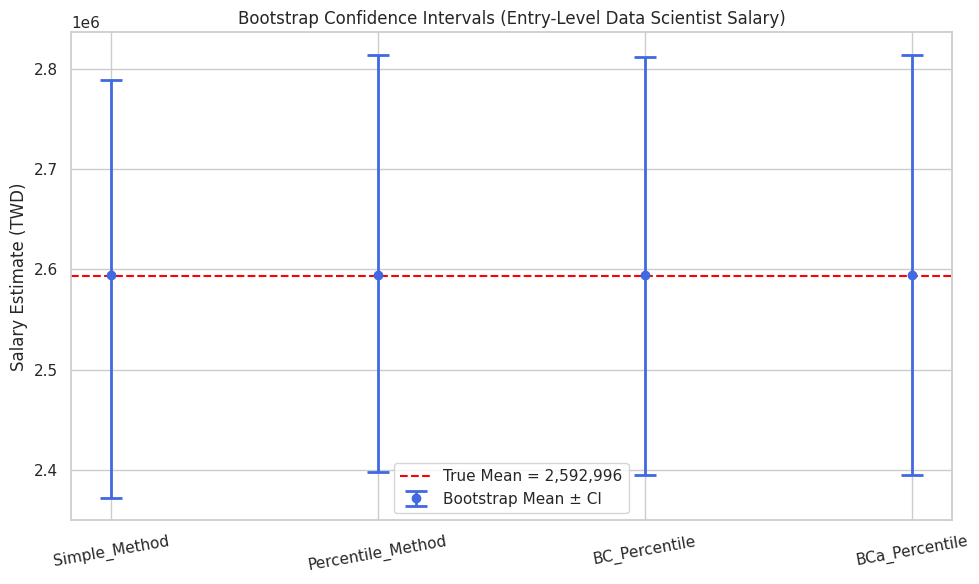

In [ ]:
sns.set(style="whitegrid")

methods = boot_table["Method"]
means = boot_table["Bootstrap_Mean"]
lower_bounds = boot_table["Lower_Bound"]
upper_bounds = boot_table["Upper_Bound"]
error_low = means - lower_bounds
error_high = upper_bounds - means

true_mean = ds_entry_df["salary_in_tw"].mean()

plt.figure(figsize=(10, 6))
plt.errorbar(methods, means, yerr=[error_low, error_high], fmt='o', capsize=8,
             capthick=2, elinewidth=2, color='royalblue', label="Bootstrap Mean ± CI")
plt.axhline(true_mean, color='red', linestyle='--', label=f"True Mean = {true_mean:,.0f}")
plt.ylabel("Salary Estimate (TWD)")
plt.title("Bootstrap Confidence Intervals (Entry-Level Data Scientist Salary)")
plt.xticks(rotation=10)
plt.legend()
plt.tight_layout()
plt.show()

### 2. Hypothesis
接下來要比較 Entry-level Data Scientist 和 Entry-level Data Engineer 的薪資差異是否顯著？

假設：

 $H_0$:兩者薪水沒有差異

 $H_1$:兩者薪水有差異

 設定$\alpha=0.05$

使用的兩種檢定方法：
1. Two sample Bootstrap Test：
  ASL = 0.4920，不拒絕$H_0$，樣本沒有強烈的證據說兩者薪水沒有差別。
2. Permutation Test：
  ASL = 0.0400，拒絕$H_0$，樣本有強烈的證據說兩者薪水有差。

雖然 Bootstrap 與 Permutation 兩種方法都可用於比較兩組平均薪資是否存在顯著差異，但在本研究中出現了不同的檢定結果，推論為以下原因：
1. 兩個方法受極端值影響的程度不同：
  * 根據薪資分布圖，ML Engineer 的年薪偏右尾，有高薪極端值。Data Scientist 分布較對稱集中。
  * Permutation Test 使用原始資料進行分組重排，對於資料中極端值更敏感。Bootstrap Test 可能會因為 resample ，使極端值影響下降，導致未檢查出顯著差異。

2. 兩個方法的分布假設不同：
  * 從薪資分布圖可見，Entry-Level ML Engineer 和 Data Scientist 分布不同。
  * Permutation Test 假設資料是可交換的，通常適合樣本分布差不多時使用。Bootstrap Test 假設每組樣本是從自己分布中抽樣出來的，較為寬鬆，所以兩者的檢定結果才會不同。

In [ ]:
# 1. Two sample Bootstrap Test
def Two_sample_Bootstrap_Test(data1, data2, B=1000):
    observed_diff = data1.mean() - data2.mean()

    boot_est1 = bootstrap(data1, B)
    boot_est2 = bootstrap(data2, B)
    boot_diff = boot_est1 - boot_est2

    ASL = np.mean(np.abs(boot_diff) >= np.abs(observed_diff))

    return ASL

ASL = Two_sample_Bootstrap_Test(ds_entry_df["salary_in_tw"], ml_df["salary_in_tw"], B=1000)
print(f"Two sample Bootstrap Test ASL (p-value): {ASL:.4f}")

Two sample Bootstrap Test ASL (p-value): 0.4920


In [ ]:
# 2. Permutation Test
def permutation_test(data1, data2, B=1000, seed=42):
    np.random.seed(seed)

    data1 = np.array(data1)
    data2 = np.array(data2)
    combined = np.concatenate([data1, data2])

    n1 = len(data1)
    observed_diff = np.mean(data1) - np.mean(data2)

    perm_diffs = []
    for _ in range(B):
        np.random.shuffle(combined)
        perm_group1 = combined[:n1]
        perm_group2 = combined[n1:]
        perm_diff = np.mean(perm_group1) - np.mean(perm_group2)
        perm_diffs.append(perm_diff)

    ASL_perm = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    return ASL_perm
ASL_perm = permutation_test(ds_entry_df["salary_in_tw"], ml_df["salary_in_tw"], B=1000)
print(f"Permutation Test ASL (p-value): {ASL_perm:.4f}")

Permutation Test ASL (p-value): 0.0400


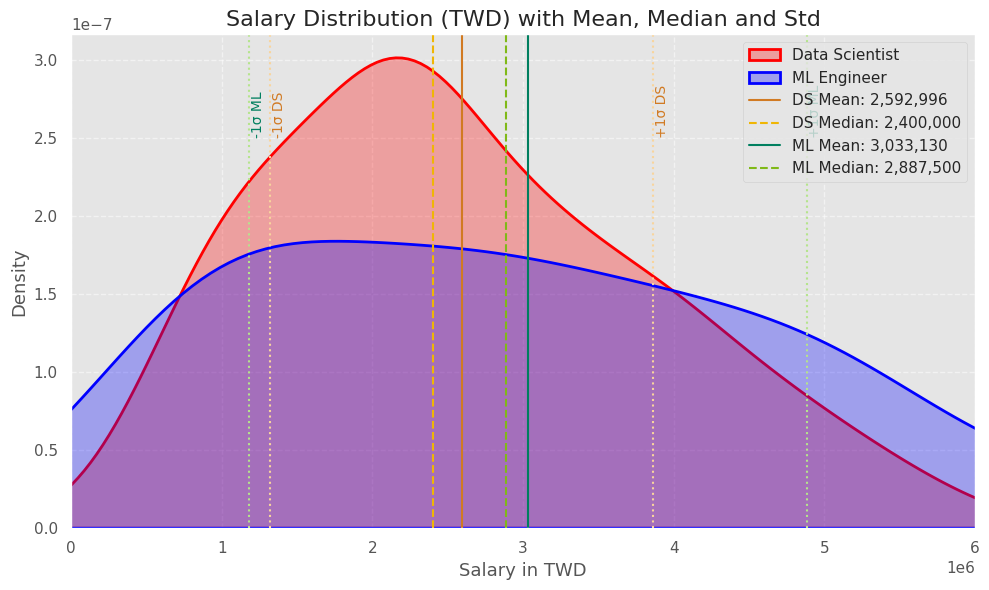

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(ds_entry_df["salary_in_tw"], label="Data Scientist", color="red", linewidth=2, fill=True, alpha=0.3)
sns.kdeplot(ml_df["salary_in_tw"], label="ML Engineer", color="blue", linewidth=2, fill=True, alpha=0.3)

mean_ds = ds_entry_df["salary_in_tw"].mean()
median_ds = ds_entry_df["salary_in_tw"].median()
std_ds = ds_entry_df["salary_in_tw"].std()

mean_ml = ml_df["salary_in_tw"].mean()
median_ml = ml_df["salary_in_tw"].median()
std_ml = ml_df["salary_in_tw"].std()

# --- Data Scientist---
plt.axvline(mean_ds, color="#D17A22", linestyle="-", label=f"DS Mean: {mean_ds:,.0f}", alpha=1)
plt.axvline(median_ds, color="#EFB605", linestyle="--", label=f"DS Median: {median_ds:,.0f}", alpha=1)
plt.axvline(mean_ds - std_ds, color="#F8D49D", linestyle=":", alpha=1)
plt.axvline(mean_ds + std_ds, color="#F8D49D", linestyle=":", alpha=1)

plt.text(mean_ds - std_ds + 10000, 0.00000025, "-1σ DS", rotation=90, color="#D17A22", ha='left', va='bottom')
plt.text(mean_ds + std_ds + 10000, 0.00000025, "+1σ DS", rotation=90, color="#D17A22", ha='left', va='bottom')


# --- ML Engineer ---
plt.axvline(mean_ml, color="#007F5F", linestyle="-", label=f"ML Mean: {mean_ml:,.0f}", alpha=1)
plt.axvline(median_ml, color="#80B918", linestyle="--", label=f"ML Median: {median_ml:,.0f}", alpha=1)
plt.axvline(mean_ml - std_ml, color="#B5E48C", linestyle=":", alpha=1)
plt.axvline(mean_ml + std_ml, color="#B5E48C", linestyle=":", alpha=1)

plt.text(mean_ml - std_ml + 10000, 0.00000025, "-1σ ML", rotation=90, color="#007F5F", ha='left', va='bottom')
plt.text(mean_ml + std_ml + 10000, 0.00000025, "+1σ ML", rotation=90, color="#007F5F", ha='left', va='bottom')


plt.title("Salary Distribution (TWD) with Mean, Median and Std", fontsize=16)
plt.xlabel("Salary in TWD", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.xlim(0, 6000000)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=11, loc="upper right")
plt.tight_layout()
plt.show()


## 5. Discuss possible directions for future work
1. 加入台灣相關資料：目前台灣關於資料科學職缺的薪資資訊較為稀少，未來若能結合就業平台（如 104人力銀行等）的資料，將有助於提升分析的實用性。
2. 細分變項探討：從本研究的薪資分布圖可見，資料科學家的薪資變異相當大。未來可以根據不同的產業（如新創公司、金融業、科技業）進行更進一步的分析，以探討產業對 Entry-Level 薪資的影響。
3. 探討更多職業類型：除了資料科學與機器學習工程師之外，像是品質管理、智慧製造工程師等，也是許多統計研究所學生的職業選擇，未來可將這些職缺納入比較範圍，擴展研究深度與廣度。
4. 嘗試更多統計檢定方法：除了 Bootstrap 與 Permutation Test，可嘗試其他檢定來判斷年薪是否有差異。

